# Imports

In [1]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape) 
print(y_train.shape)
print(x_test.shape) 
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
x_train[0].shape

(28, 28)

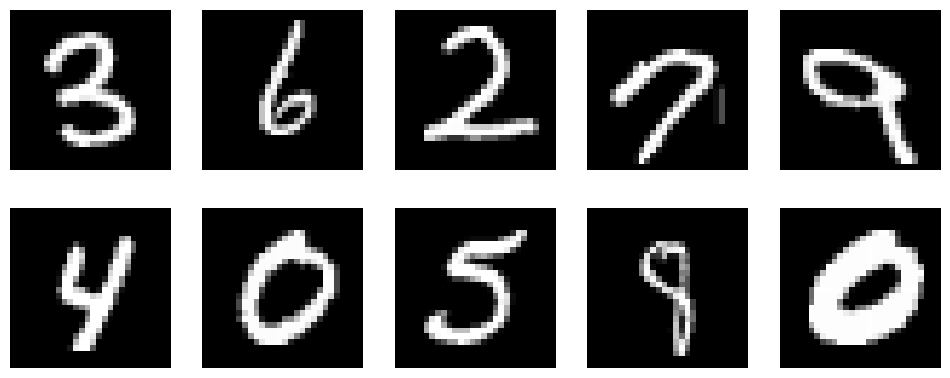

In [5]:
for i in range(10):
    num = np.random.randint(1,40000,1)[0]
    plt.figure(10,figsize=(12,15))
    plt.subplot(6,5,i+1)
    plt.imshow(x_train[num,:,:],cmap='gray')
    plt.axis('off')

# Scaling

In [6]:
x_train = x_train/255
x_test = x_test/255

print(x_train.min(),x_train.max())

0.0 1.0


# Model Creation

In [7]:
model  = keras.models.Sequential([keras.layers.Flatten(input_shape=(28,28,1)), # input layer
#                                   keras.layers.Dense(128,activation='relu'), # hidden layer
                                  keras.layers.Dense(4,activation='relu'), # hidden layer
                                  keras.layers.Dense(10)]) # output layer

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________


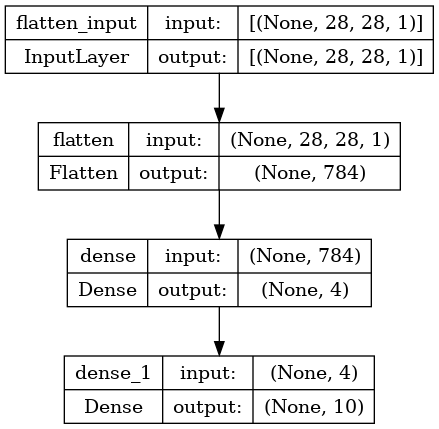

In [9]:
plot_model(model, show_shapes=True, show_layer_names=True)

In [10]:
hyper_parameters = []

In [11]:
batch_size = 32
epochs = 5
learning_rate = 0.001

In [12]:
loss_func = keras.losses.SparseCategoricalCrossentropy(from_logits=True) # produces a aprobabilty between 0 and 1

optimizer = keras.optimizers.SGD(learning_rate = learning_rate)

model.compile(optimizer = optimizer, loss = loss_func, metrics=['accuracy'])

# Model Training and Testing

In [13]:
history = model.fit(x_train,y_train, validation_split=0.2,epochs = epochs, batch_size=batch_size)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 2.1782 - accuracy: 0.1822 - val_loss: 2.0826 - val_accuracy: 0.2512
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 2.0427 - accuracy: 0.2754 - val_loss: 1.9866 - val_accuracy: 0.3141
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.9580 - accuracy: 0.3234 - val_loss: 1.9028 - val_accuracy: 0.3548
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.8789 - accuracy: 0.3541 - val_loss: 1.8207 - val_accuracy: 0.3800
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 1.8005 - accuracy: 0.3723 - val_loss: 1.7398 - val_accuracy: 0.3950


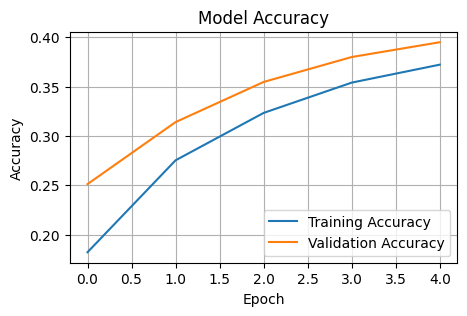

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(5, 3))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
# plt.ylim(0, 1)
plt.grid(True)
plt.show()

In [15]:
[test_loss , test_accuracy] = model.evaluate(x_test,y_test)
print('Test Accuracy: ',test_accuracy)
print("Test loss:",test_loss)

313/313 [==============================] - 1s 1ms/step - loss: 1.7556 - accuracy: 0.3793
Test Accuracy:  0.37929999828338623
Test loss: 1.7555779218673706


# Make predictions on a sample of the test set


1/1 [==============================] - 0s 107ms/step


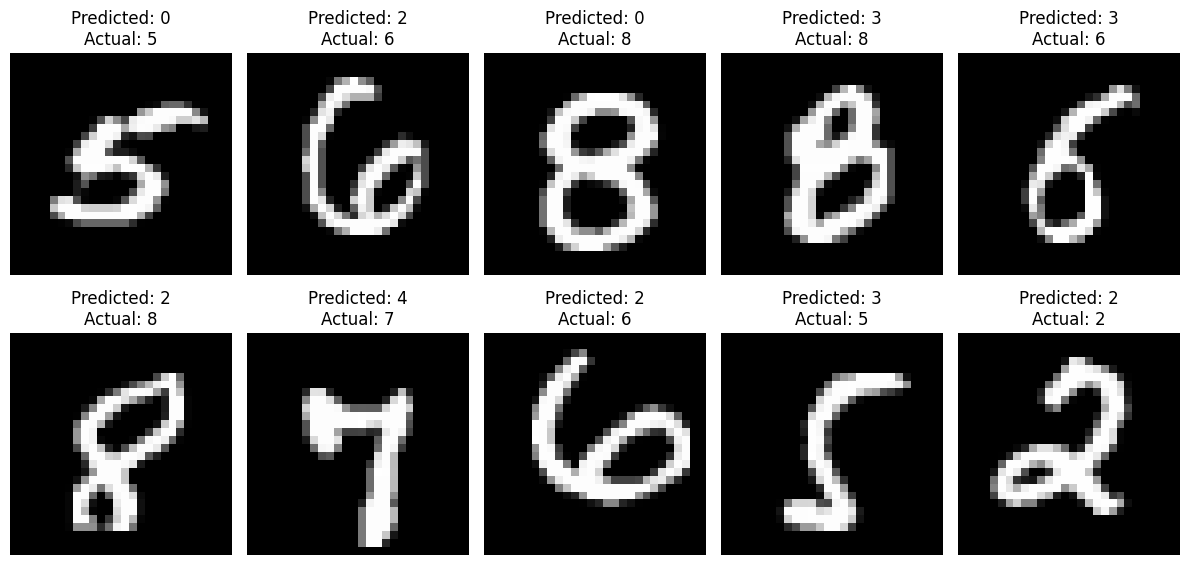

In [16]:
sample_size = 10  # Number of samples to plot
sample_indices = np.random.choice(len(x_test), size=sample_size, replace=False)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]
predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

# Plot the sample images with their predicted labels
plt.figure(figsize=(12, 6))
for i in range(sample_size):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i], cmap='gray')
    plt.title(f'Predicted: {predicted_labels[i]}\nActual: {sample_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()


# Hyper-Parameters Tuning

In [17]:
def train_model(batch_size, optimizer, num_epochs, learning_rate):
    # Create a neural network model
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(10)
    ])

    # Compile the model with specified optimizer and learning rate
    model.compile(optimizer=optimizer(learning_rate=learning_rate),
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=num_epochs,
                        validation_data=(x_test, y_test),
                        verbose=0)

    # Evaluate the model on test data
    test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

    return history, test_loss, test_accuracy



In [18]:
# # Define hyperparameters to experiment with
# batch_sizes = [16, 32, 64]
# optimizers = [tf.keras.optimizers.Adam, tf.keras.optimizers.SGD]
# num_epochs = [5]
# learning_rates = [0.001, 0.01, 0.1]

# # Perform experiments
# results = []

# for batch_size in batch_sizes:
#     for optimizer in optimizers:
#         for epochs in num_epochs:
#             for learning_rate in learning_rates:
#                 history, test_loss, test_accuracy = train_model(batch_size, optimizer, epochs, learning_rate)
#                 result = {
#                     'batch_size': batch_size,
#                     'optimizer': optimizer.__name__,
#                     'num_epochs': epochs,
#                     'learning_rate': learning_rate,
#                     'test_loss': test_loss,
#                     'test_accuracy': test_accuracy
#                 }
#                 print(result)
#                 results.append(result)

# # Display or save results as needed
# for result in results:
#     print(result)